# FIT 5196: Assignment 2

## Task 2: Data Reshaping and Transformation <br><br>

**Name:** Chaitanya Tambolkar   

**Student ID:** 34093117

**Name:** Fahmid Tawsif Khan Chowdhury 

**Student ID:** 34121315

## 1. Introduction

In this analysis, we applied various transformations to the independent variables (such as cube root, exponential, and square root) to ensure normality and linearity before conducting linear regression. For the dependent variable, median_house_price, we tested different transformations (logarithmic and Box-Cox) to improve model performance and meet regression assumptions. Additionally, we considered the need for scaling the variables, ultimately selecting Standard Scaler to standardize the features. This decision was made to ensure that all variables have a consistent scale, as the independent variables differed significantly in their units and ranges.

**Import Libraries**

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer
from scipy.stats import boxcox
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from statsmodels.nonparametric.smoothers_lowess import lowess
from scipy.stats import pearsonr
from scipy import stats
import statsmodels.api as sm

## 2. Data Preprocessing

We load the data from the provided `suburb_info.xlsx` file and take an initial look at the data to understand its structure.

In [2]:
import pandas as pd

# Load the data
df = pd.read_excel('suburb_info.xlsx')

# Display the first few rows of the dataset
df.head()

,suburb,number_of_houses,number_of_units,municipality,aus_born_perc,median_income,median_house_price,population
0,ABBOTSFORD,2304,4706,Yarra,68%,"$1,797","$1,299,400",4025
1,ABERFELDIE,1410,453,Moonee Valley,81%,"$1,571","$1,926,600",22442
2,ALBANVALE,1897,138,Brimbank,46%,$907,"$594,200",54005
3,ALBION,1389,1392,Brimbank,52%,$929,"$739,100",30677
4,ALPHINGTON,1729,1099,Darebin,73%,"$1,538","$1,729,600",9227


Before applying transformations, we need to handle any prevalent missing values and convert some columns to numerical data. For instance, we remove percentage symbols from `aus_born_perc` and convert it to float.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   suburb              202 non-null    object
 1   number_of_houses    202 non-null    int64 
 2   number_of_units     202 non-null    int64 
 3   municipality        202 non-null    object
 4   aus_born_perc       202 non-null    object
 5   median_income       202 non-null    object
 6   median_house_price  202 non-null    object
 7   population          202 non-null    int64 
dtypes: int64(3), object(5)
memory usage: 12.8+ KB


In [4]:
# Convert 'aus_born_perc' to numeric (remove '%' symbol and convert to float)
df['aus_born_perc'] = df['aus_born_perc'].str.rstrip('%').astype('float') / 100

# Convert 'median_income' and 'median_house_price' to numeric after removing '$' and ',' characters
df['median_income'] = df['median_income'].replace({'\$': '', ',': ''}, regex=True).astype(float)
df['median_house_price'] = df['median_house_price'].replace({'\$': '', ',': ''}, regex=True).astype(float)

# Check for missing values
df.isnull().sum()

suburb                0
number_of_houses      0
number_of_units       0
municipality          0
aus_born_perc         0
median_income         0
median_house_price    0
population            0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   suburb              202 non-null    object 
 1   number_of_houses    202 non-null    int64  
 2   number_of_units     202 non-null    int64  
 3   municipality        202 non-null    object 
 4   aus_born_perc       202 non-null    float64
 5   median_income       202 non-null    float64
 6   median_house_price  202 non-null    float64
 7   population          202 non-null    int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 12.8+ KB


## 3. Exploratory Data Analysis
We perform exploratory analysis to check the distribution of the features. This will help us determine if any transformation or scaling is necessary.


In [6]:
# Describe the dataset to understand distributions
df.describe().round(2)

,number_of_houses,number_of_units,aus_born_perc,median_income,median_house_price,population
count,202.00,202.00,202.00,202.00,202.00,202.00
mean,4155.77,2480.41,0.68,1387.94,1218816.83,18659.31
std,3400.86,3132.68,0.11,317.84,471680.74,9604.19
min,283.00,60.00,0.36,633.00,507200.00,170.00
25%,1973.50,620.50,0.62,1182.25,870675.00,12063.00
50%,3256.50,1603.00,0.70,1393.00,1134500.00,17583.00
75%,5518.50,3089.00,0.77,1560.00,1467550.00,24045.00
max,23338.00,24380.00,0.88,2352.00,2875800.00,54005.00


### 3.1 Pairplots with Locally Weighted Smoothing Curve

/Users/fahmidtawsifkhanchowdhury/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


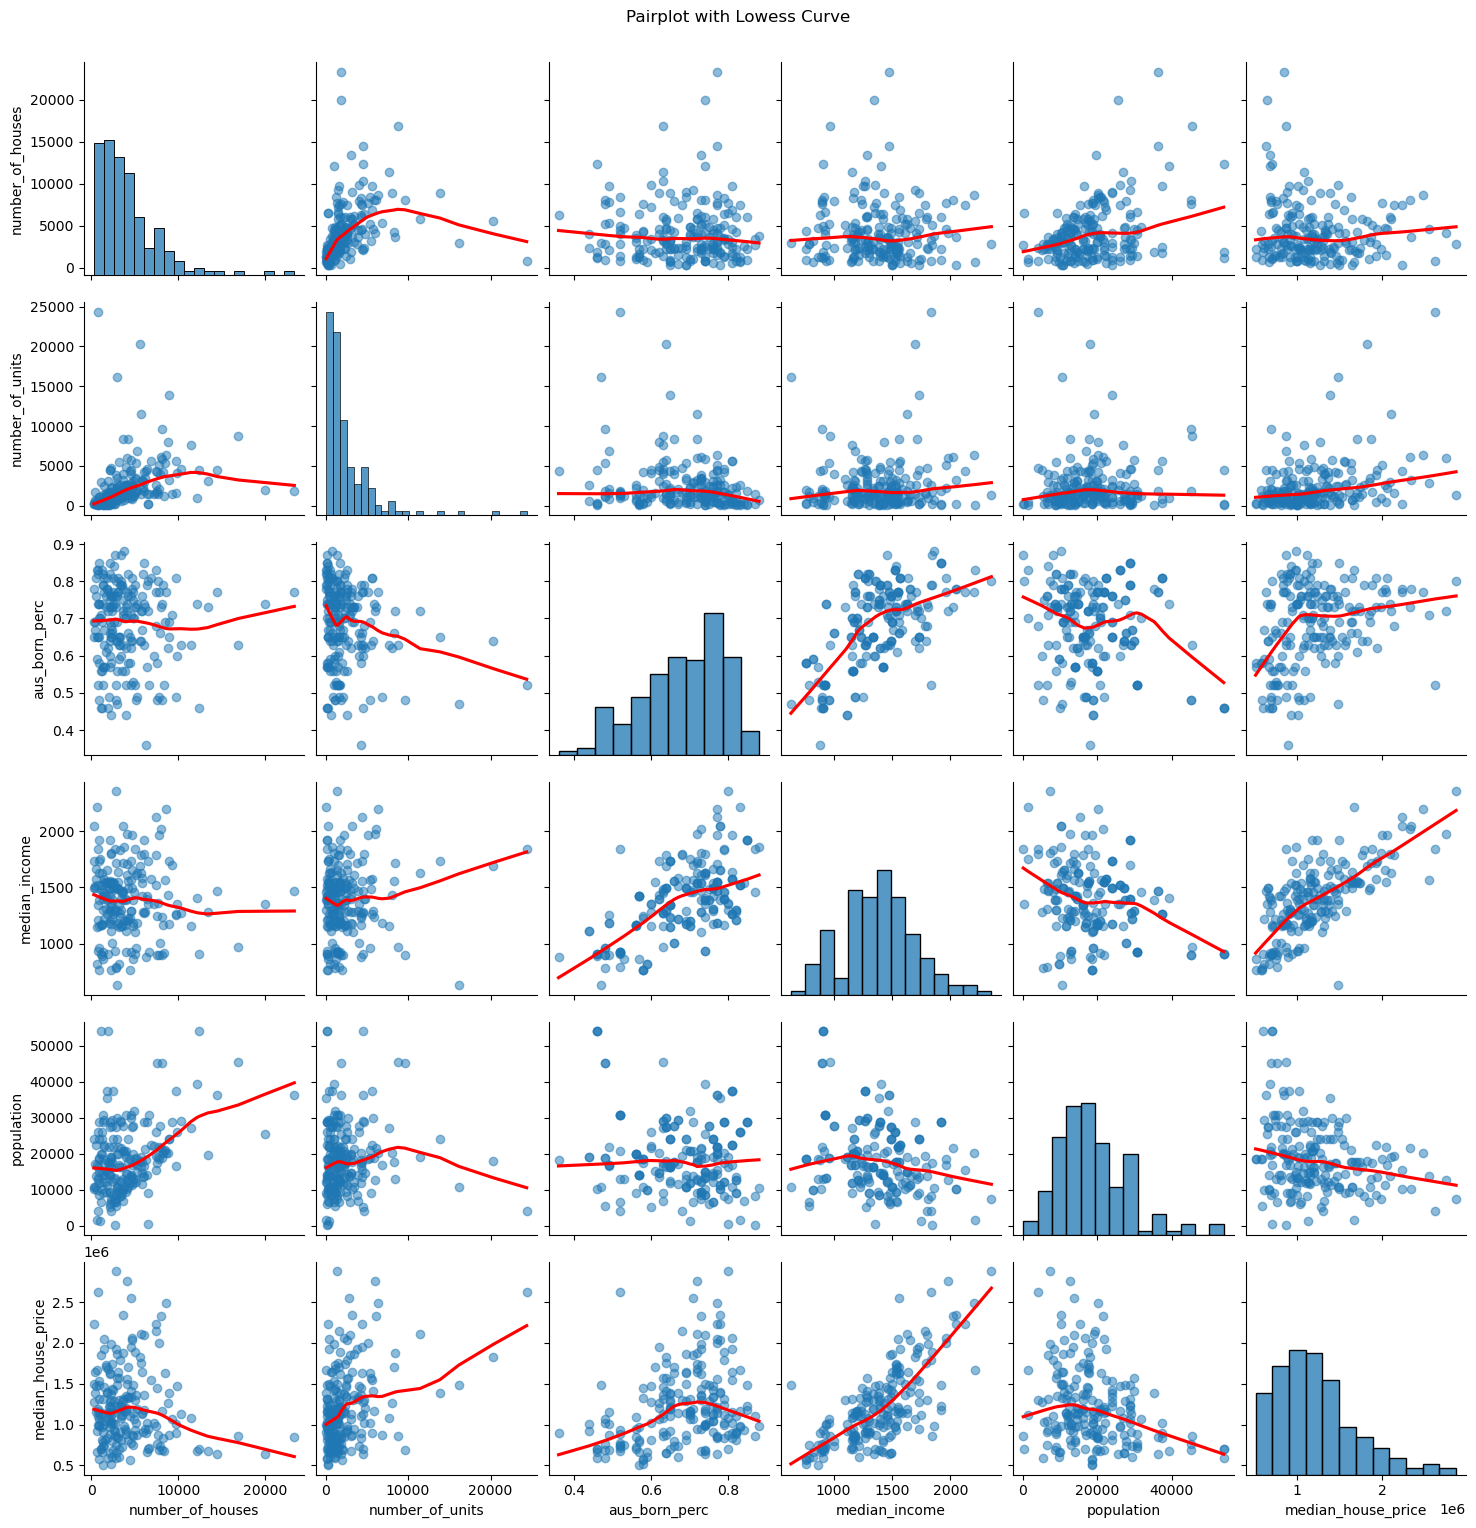

In [7]:
# Combine the features and target variable into one DataFrame for pairplot
df_pairplot = df[['number_of_houses', 'number_of_units', 'aus_born_perc', 
                  'median_income', 'population', 'median_house_price']]

# Generate pairplot with Lowess Curve
sns.pairplot(df_pairplot, kind="reg", plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.5}, 'lowess': True})
plt.suptitle('Pairplot with Lowess Curve', y = 1.02)
plt.show()

**Number of Houses (number_of_houses):** The distribution of number_of_houses is positively skewed, with the majority of areas having relatively fewer houses and a small number of areas showing very high values.

The Lowess curve suggests a non-linear relationship, where initially an increase in the number of houses correlates with a slight decrease in house prices, but the trend then levels off. Given the variability and the curve’s shape, a transformation might help linearize this relationship and improve model performance.

**Number of Units (number_of_units):** The distribution of number_of_units is positively skewed, with most areas having a relatively small number of units, while a few areas have significantly higher values, which could be considered outliers. 

The scatterplot shows a moderate positive relationship with some non-linearity, suggesting that as the number of units increases, median house prices tend to rise. However, the curve’s fluctuation hints at some variability, and transformations (such as log or polynomial) could help capture this relationship more accurately.

**Australian Born Percentage (aus_born_perc):** The distribution of aus_born_perc is approximately normal with a slight left skew. Most areas have around 60–80% of residents born in Australia. 

The scatterplot shows a slight non-linear relationship with median house price, with areas of higher Australian-born percentages showing lower house prices. The curve suggests a potential need for transformation.

**Median Income (median_income):** Median_income follows a relatively normal distribution with a slight right skew. 

The scatterplot confirms a clear positive relationship between median income and median house prices, but there is slight non-linearity, particularly at the higher end of the income range. While the overall relationship is strong, a  transformation could further stabilize this relationship and capture any curvature at the upper range.

**Population:** The distribution of population is right-skewed, with the majority of areas having smaller populations (below 25,000). A few areas have significantly larger populations, suggesting potential outliers. 

The Lowess curve suggests a more complex, non-linear relationship between population and house prices. Given the shape of the curve and the high variability in the data, a transformation would likely help normalize the distribution and create a more linear relationship.

**Median House Price (median_house_price):**
The distribution of median_house_price is positively skewed, with most areas having house prices between 0.5 million and 1.5 million AUD. There are fewer areas with very high house prices, possibly outliers. 

The scatterplots of median house price against the other variables reveal non-linear or highly variable relationships in several cases. The Lowess curves highlight these non-linear trends, suggesting that transformations could be beneficial for linearizing these relationships and stabilizing the variance to improve model fit.

### 3.2 Correlation Matrix

We wanted to examine the relationships between the variables even further. By quantifying these relationships, we can identify strong associations and also assess the potential need for variable transformations to improve linearity and model performance. The correlation matrix also helps in detecting multicollinearity.

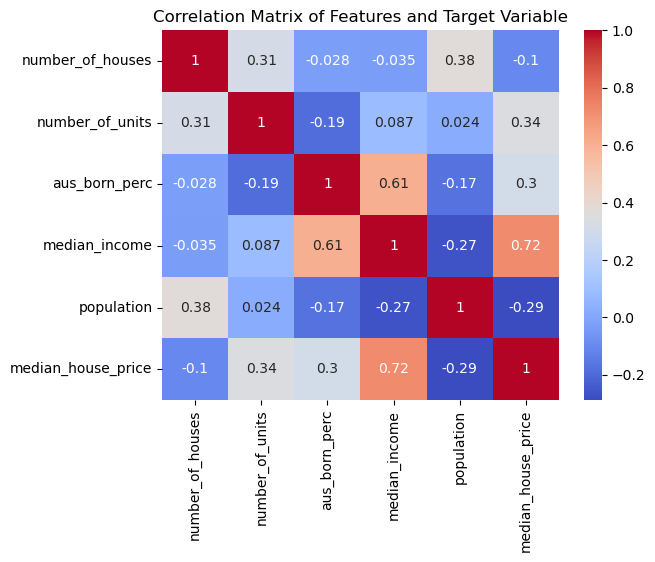

In [8]:
# Calculate correlation matrix
corr_matrix = df_pairplot.corr()

# Display the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Features and Target Variable')
plt.show()

**number_of_houses:** Correlation with median_house_price is -0.10. The relationship between the number of houses and house prices is weak and slightly negative. As seen in the parplot, as the number of houses increases, house prices initially decrease slightly before flattening out. Given this slight non-linearity and the variability in the data, a transformation may improve the linearity and model performance.

**number_of_units:** Correlation with median_house_price is 0.34. While the relationship appears somewhat linear, it may benefit from further exploration, especially as the scatterplot shows deviations from linearity. Applying transformations could fine-tune the linear relationship, potentially making it more robust for prediction.

**aus_born_perc:** Correlation with median_house_price is 0.30. There is a moderate positive correlation between the percentage of Australian-born residents and house prices. However, the curvature observed in the pairplot suggests transformations might further optimize the model’s ability to capture this relationship.

**median_income:** Correlation with median_house_price is 0.72. This is the strongest relationship observed in the data, with a significant positive correlation between income and house prices. This linear relationship aligns with expectations: higher incomes lead to higher house prices. Although it seems very linear, transformations (like logarithmic) could still be explored to address any potential skewness.

**population:** Correlation with median_house_price is -0.29. A moderate negative correlation suggests that areas with higher populations tend to have lower house prices. Given that population is highly skewed and the lowess curve showed variability, applying a transformation, could help normalize the distribution and improve the linear relationship between population and house prices, making it easier to model.

## 4. Data Transformation


### 4.1 Tukey's Ladder of Power

Tukey’s Ladder of Power is a transformation framework used to stabilize variance, normalize data, and linearize relationships between variables. The idea is to apply a series of mathematical transformations, ordered by their “power,” to address specific data issues such as skewness, non-linearity, or heteroscedasticity. The ladder ranges from powers that compress large values to powers that expand small values. The goal is to choose a transformation that makes the data distribution more normal or enhances the linearity of relationships.

### 4.2 Application of Tukey’s Ladder to the Variables

Each variable in the dataset has unique characteristics, so different transformations may help improve the data distribution and relationships. Below are the two suggested transformations for each variable.

**number_of_houses**
Positively skewed distribution with high variability, especially in areas with very high values. 

Possible transformations: 
- Logarithmic: It compresses large values and stretches small ones.
- Square Root transformation: A gentler transformation compared to the logarithm.
- Cubic Root transformation: Offers a balance between the Square Root and Logarithmic transformations.
- Box-Cox: 

**number_of_units**
Positively skewed distribution with outliers; moderate positive correlation with house prices.

Possible transformations:

- Logarithmic: It compresses large values and stretches small ones.
- Square Root transformation: A gentler transformation compared to the logarithm.
- Cubic Root transformation: Offers a balance between the Square Root and Logarithmic transformations.

**aus_born_perc**
Slight left skew with a moderate positive correlation with house prices. Since this is a percentage, additional transformations are considered.

Possible transformations:

- Logit Transformation: Maps the data onto the real number line, stabilizing variance and linearizing the relationship.
- Power of 2:
- Power of 3:
- exp: 

**median_income**
Slight right skew with a strong positive correlation with house prices, showing some non-linearity at higher values.

Possible transformations:

- Square Root transformation: A gentler transformation compared to the logarithm.
- Logarithmic: Reduces skewness and stabilizes variance, particularly useful for income variables.
- Cubic Root transformation: Offers a balance between the Square Root and Logarithmic transformations.

**population**
Heavily right-skewed distribution with moderate negative correlation with house prices, containing outliers.

Possible transformations:

- Logarithmic: Reduces the influence of outliers and stabilizes variance for highly skewed data like population.
- Square Root transformation: A gentler transformation compared to the logarithm.
- Reciprocal: Aggressively normalizes the distribution by compressing large population values.

**median_house_price**
Positively skewed distribution with non-linear relationships observed in scatterplots.

Possible transformations:

- Logarithmic: Linearizes the relationship between house price and other predictors, especially across a wide range of prices.
- Square Root: A gentler transformation that reduces skewness while retaining much of the original scale.
- Cubic Root transformation: Offers a balance between the Square Root and Logarithmic transformations.
- Box-Cox: 

### 4.3 Variable Transformation Methodology

In the initial stage of our analysis, we inspected the distributions of relevant variables after applying several transformations. This step was crucial for identifying which transformations brought the variables closer to a normal distribution. Achieving a normal distribution is important because linear regression relies on the assumption that variables or residuals are normally distributed. When this assumption is met, the model tends to produce more reliable estimates, better confidence intervals, and more accurate predictions. 

After identify the important transformations, we removed transformations that fail to normalize the data effectively and focus on those that produce distributions approximating normality.

Following the shortlisting of trasnformation techniques, we proceeded by plotting scatter plots with regression lines and calculating the correlation. This approach allowed us to visually and empirically evaluate whether the transformed variables exhibited a more linear relationship with the target variable than before.

#### 4.3.1 Variable: number_of_houses and median_house_price

We began by analyzing the relationship between the variable number_of_houses and the target variable: median_house_price. To address the skewness and non-linearity in the data, we applied several transformations, including Logarithmic, Square Root, Cube Root, and Box-Cox transformations. These transformations were chosen based on our prior analysis of the data distributions. The aim is to make number_of_houses more normally distributed and linearize its relationship with the target variable.

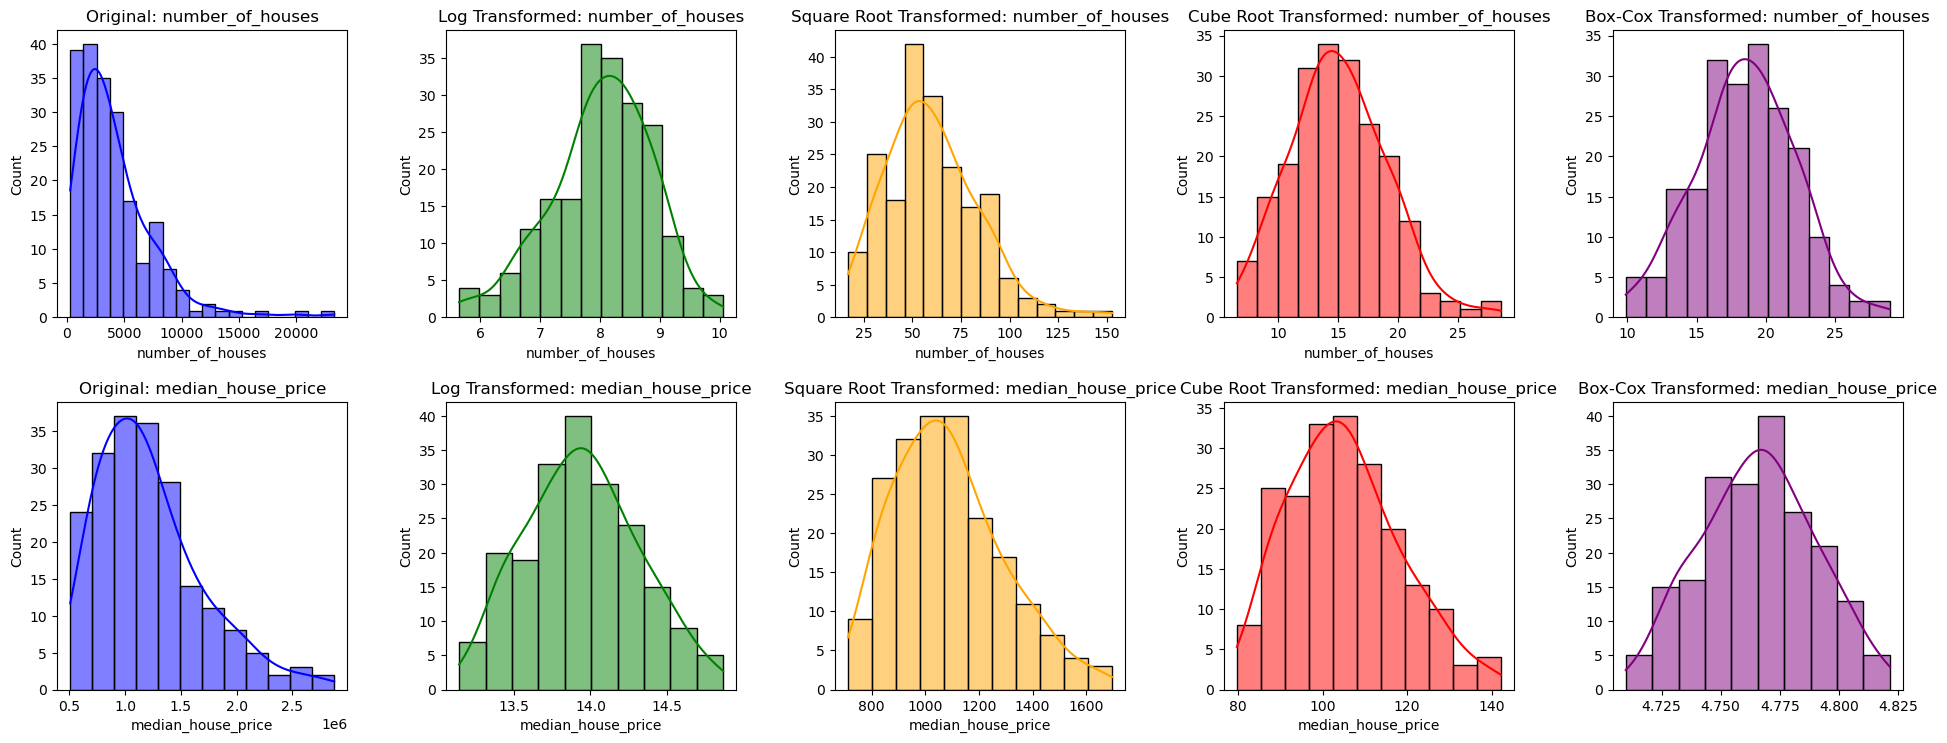

In [9]:
variables = ['number_of_houses', 'median_house_price'] 

# Create subplots to compare the original and transformed distributions
fig, axes = plt.subplots(len(variables), 5, figsize=(20, 4 * len(variables)))
fig.tight_layout(pad=4.0)

if len(variables) == 1:
    axes = [axes]

for i, var in enumerate(variables):
    # Original distribution
    sns.histplot(df[var], kde=True, ax=axes[i][0], color='blue')
    axes[i][0].set_title(f'Original: {var}')
    
    # Log transformation
    sns.histplot(np.log(df[var]), kde=True, ax=axes[i][1], color='green')
    axes[i][1].set_title(f'Log Transformed: {var}')

    # Square root transformation
    sns.histplot(np.sqrt(df[var]), kde=True, ax=axes[i][2], color='orange')
    axes[i][2].set_title(f'Square Root Transformed: {var}')

    # Cube root transformation
    sns.histplot(np.cbrt(df[var]), kde=True, ax=axes[i][3], color='red')
    axes[i][3].set_title(f'Cube Root Transformed: {var}')
    
    # Box-Cox transformation (works only for positive values)
    boxcox_transformed, _ = boxcox(df[var])
    sns.histplot(boxcox_transformed, kde=True, ax=axes[i][4], color='purple')
    axes[i][4].set_title(f'Box-Cox Transformed: {var}')

plt.show()

**number_of_houses**

The plots reveal that the Cube Root and Box-Cox transformations are the most effective in normalizing the distribution of this variable. While the Logarithmic transformation reduces skewness, a slight right skew remains, making it less ideal and therefore, we rejected it. The untransformed and Square Root transformations are discarded due to their poor fit.

**number_of_houses**

The plots indicate that the Logarithmic and Box-Cox transformations best normalize the distribution. However, the untransformed version will also be considered for further analysis, as it may exhibit better linear relationships with the independent variables when left untransformed. The remaining transformations are rejected.

In [10]:
# Function to plot scatter with regression line and print correlation
def scatter_plot_with_regression(x, y, title, xlabel, ylabel):
    plt.figure(figsize=(6, 4))
    sns.regplot(x=x, y=y, line_kws={"color": "red"})
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

    # Calculate and print correlation
    correlation = np.corrcoef(x, y)[0, 1]
    print(f"Correlation: {correlation:.4f}")

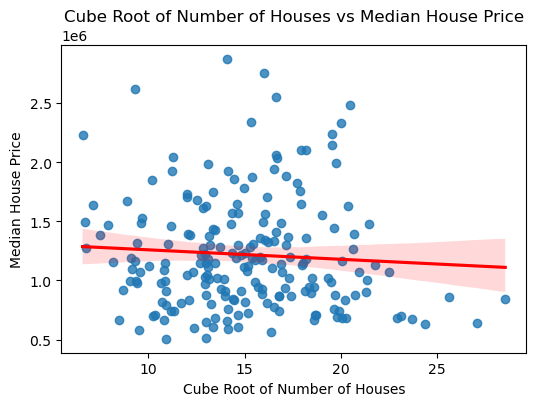

Correlation: -0.0681


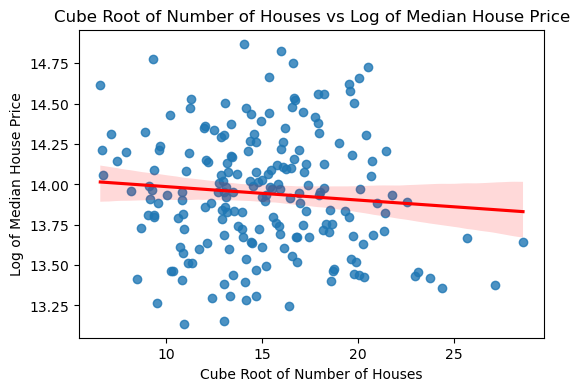

Correlation: -0.0906


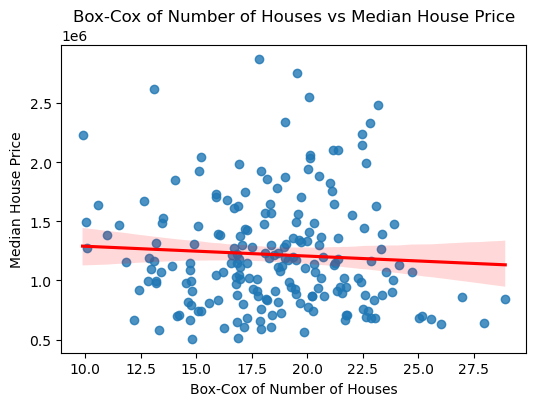

Correlation: -0.0628


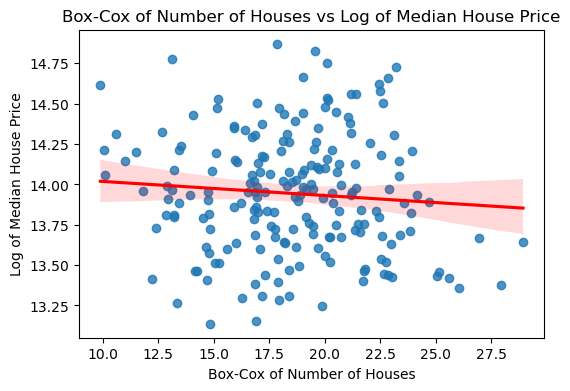

Correlation: -0.0841


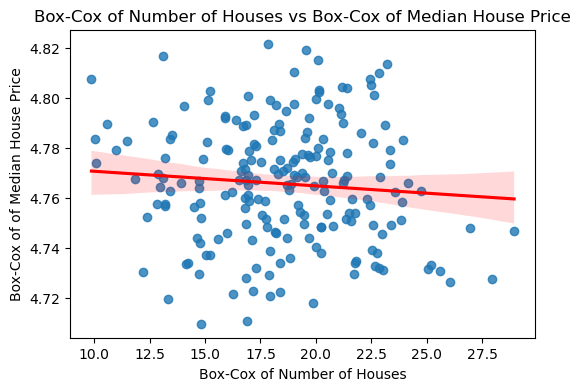

Correlation: -0.0870


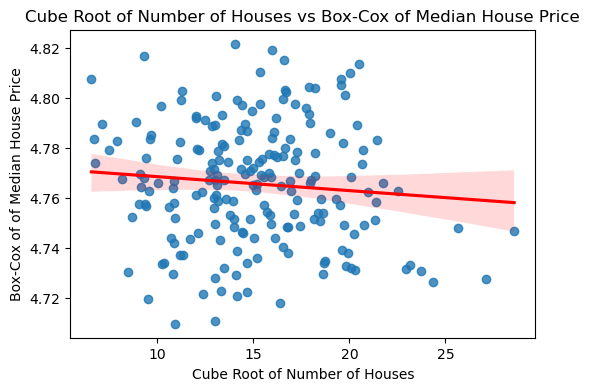

Correlation: -0.0937


In [11]:
df['log_median_house_price'] = np.log(df['median_house_price'])

# Scatter plot and correlation for cube root of number_of_houses vs median_house_price
df['cube_root_number_of_houses'] = np.cbrt(df['number_of_houses'])
scatter_plot_with_regression(df['cube_root_number_of_houses'], df['median_house_price'], 
                             'Cube Root of Number of Houses vs Median House Price', 
                             'Cube Root of Number of Houses', 'Median House Price')


# Scatter plot and correlation for cube root of number_of_houses vs log of median_house_price
scatter_plot_with_regression(df['cube_root_number_of_houses'], df['log_median_house_price'], 
                             'Cube Root of Number of Houses vs Log of Median House Price', 
                             'Cube Root of Number of Houses', 'Log of Median House Price')

# Apply Box-Cox Transformation for number_of_houses
df['boxcox_number_of_houses'], fitted_lambda_houses = stats.boxcox(df['number_of_houses'])

# Apply Box-Cox Transformation for median_house_price
df['boxcox_median_house_price'], fitted_lambda_houses = stats.boxcox(df['median_house_price'])

# Scatter plot and correlation for Box-Cox transformed number_of_houses vs median_house_price
scatter_plot_with_regression(df['boxcox_number_of_houses'], df['median_house_price'], 
                             'Box-Cox of Number of Houses vs Median House Price', 
                             'Box-Cox of Number of Houses', 'Median House Price')

# Scatter plot and correlation for Box-Cox transformed number_of_houses vs log of median_house_price
scatter_plot_with_regression(df['boxcox_number_of_houses'], df['log_median_house_price'], 
                             'Box-Cox of Number of Houses vs Log of Median House Price', 
                             'Box-Cox of Number of Houses', 'Log of Median House Price')

# Scatter plot and correlation for Box-Cox transformed number_of_houses vs Box-Cox transformed median_house_price
scatter_plot_with_regression(df['boxcox_number_of_houses'], df['boxcox_median_house_price'], 
                             'Box-Cox of Number of Houses vs Box-Cox of Median House Price', 
                             'Box-Cox of Number of Houses', 'Box-Cox of of Median House Price')

# Scatter plot and correlation for cube root of number_of_houses vs Box-Cox transformed median_house_price
scatter_plot_with_regression(df['cube_root_number_of_houses'], df['boxcox_median_house_price'], 
                             'Cube Root of Number of Houses vs Box-Cox of Median House Price', 
                             'Cube Root of Number of Houses', 'Box-Cox of of Median House Price')

All the plots exhibit similar variability along the regression line. As previously noted, the correlation between number_of_houses and median_house_price was weak (-0.10). Still, transformation was necessary to normalize the data. After transforming and approximately normalizing both variables, the relationship between cube root number_of_houses and Box-Cox transformed median_house_price yields the best correlation (-0.0937). This is closely followed by the cube root number_of_houses versus the log-transformed median_house_price with a correlation of -0.0906. We conclude that the cube root transformation is the most effective for number_of_houses. However, further analysis is needed to determine the optimal transformation for median_house_price (log, Box-Cox, or untransformed) after evaluating its relationships with other variables.

#### 4.3.2 Variable: number_of_units

For number_of_units, we applied Logarithmic, Square Root, Box-Cox and Cube Root transformations to evaluate their effectiveness. After determining the most suitable transformation, we further analyzed its relationship with median_house_price, log-transformed median_house_price, and Box-Cox-transformed median_house_price to assess linearity and correlation.

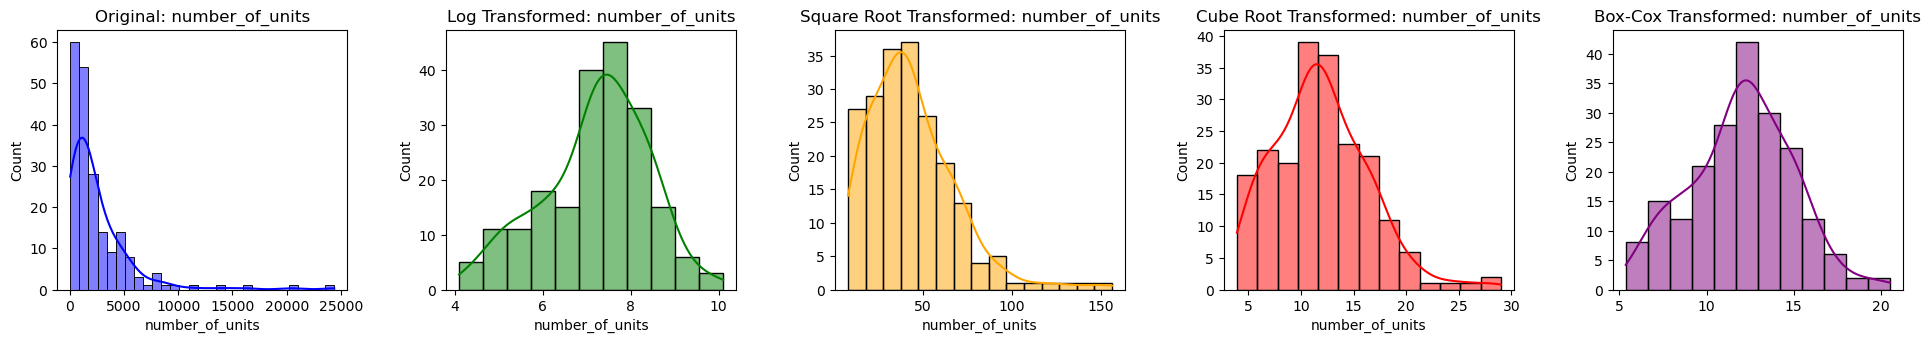

In [12]:
variables = ['number_of_units']

# Create subplots to compare the original and transformed distributions
fig, axes = plt.subplots(len(variables), 5, figsize=(20, 4 * len(variables)))
fig.tight_layout(pad=4.0)

# Flatten axes if there is only one row
if len(variables) == 1:
    axes = [axes]

for i, var in enumerate(variables):
    # Original distribution
    sns.histplot(df[var], kde=True, ax=axes[i][0], color='blue')
    axes[i][0].set_title(f'Original: {var}')
    
    # Log transformation
    sns.histplot(np.log(df[var]), kde=True, ax=axes[i][1], color='green')
    axes[i][1].set_title(f'Log Transformed: {var}')

    # Square root transformation
    sns.histplot(np.sqrt(df[var]), kde=True, ax=axes[i][2], color='orange')
    axes[i][2].set_title(f'Square Root Transformed: {var}')

    # Cube root transformation
    sns.histplot(np.cbrt(df[var]), kde=True, ax=axes[i][3], color='red')
    axes[i][3].set_title(f'Cube Root Transformed: {var}')
    
    # Box-Cox transformation 
    transformed, _ = stats.boxcox(df[var])
    sns.histplot(transformed, kde=True, ax=axes[i][4], color='purple')
    axes[i][4].set_title(f'Box-Cox Transformed: {var}')

plt.show()

The plots reveal that the Cube Root and Box-Cox transformations are the most effective in normalizing the distribution of this variable. Again, the Logarithmic transformation reduces skewness, but there is a slight left skew. So we reject Logarithmic transformation. The untransformed and Square Root transformations are discarded due to their poor fit.

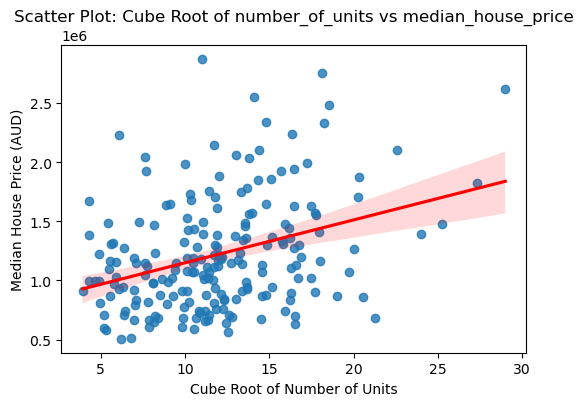

Correlation: 0.3481


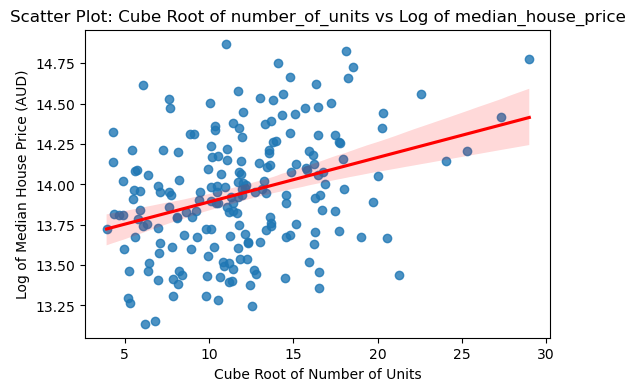

Correlation: 0.3368


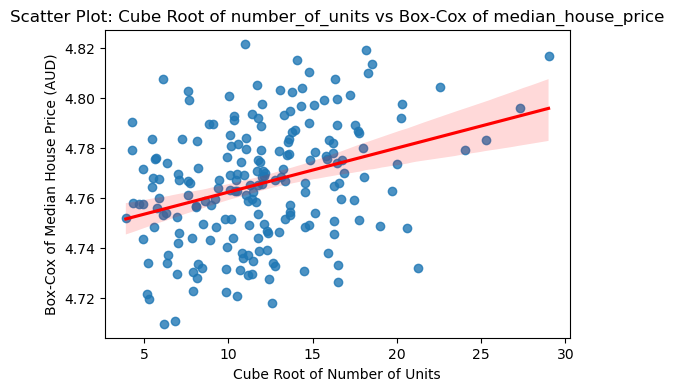

Correlation: 0.3328


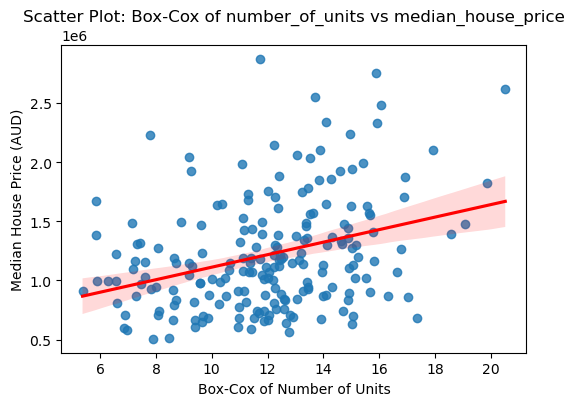

Correlation: 0.3307


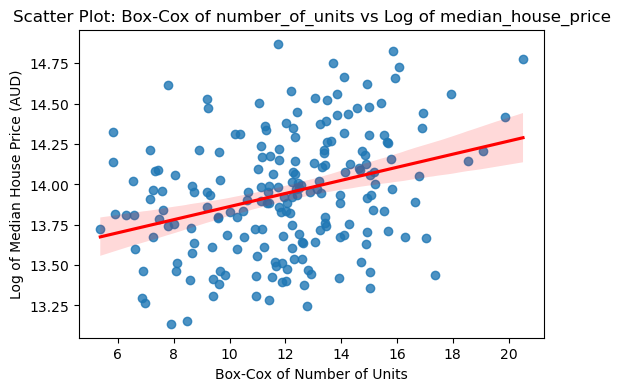

Correlation: 0.3229


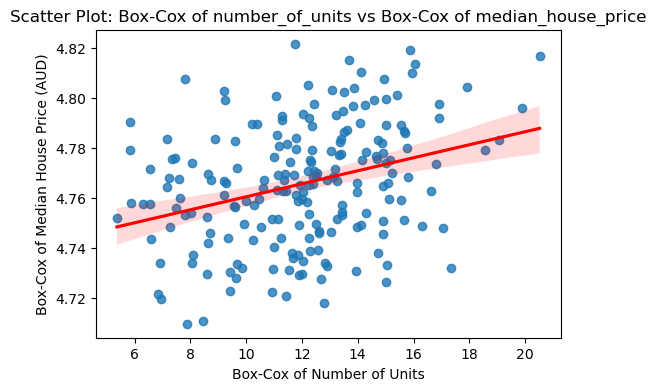

Correlation: 0.3197


In [13]:
# Scatter plot and correlation for cube root of number_of_units vs median_house_price
scatter_plot_with_regression(np.cbrt(df['number_of_units']), 
                             df['median_house_price'], 
                             'Scatter Plot: Cube Root of number_of_units vs median_house_price', 
                             'Cube Root of Number of Units', 
                             'Median House Price (AUD)')

# Scatter plot and correlation for cube root of number_of_units vs log median_house_price
scatter_plot_with_regression(np.cbrt(df['number_of_units']), 
                             df['log_median_house_price'], 
                             'Scatter Plot: Cube Root of number_of_units vs Log of median_house_price', 
                             'Cube Root of Number of Units', 
                             'Log of Median House Price (AUD)')

# Scatter plot and correlation for cube root of number_of_units vs Box-Cox transformed median_house_price
scatter_plot_with_regression(np.cbrt(df['number_of_units']), 
                             df['boxcox_median_house_price'], 
                             'Scatter Plot: Cube Root of number_of_units vs Box-Cox of median_house_price', 
                             'Cube Root of Number of Units', 
                             'Box-Cox of Median House Price (AUD)')

# Apply Box-Cox Transformation for number_of_units
df['boxcox_number_of_units'], fitted_lambda_units = stats.boxcox(df['number_of_units'])

# Scatter plot and correlation for Box-Cox transformed number_of_units vs median_house_price
scatter_plot_with_regression(df['boxcox_number_of_units'], 
                             df['median_house_price'], 
                             'Scatter Plot: Box-Cox of number_of_units vs median_house_price', 
                             'Box-Cox of Number of Units', 
                             'Median House Price (AUD)')

# Scatter plot and correlation for Box-Cox transformed number_of_units vs log of median_house_price
scatter_plot_with_regression(df['boxcox_number_of_units'], 
                             df['log_median_house_price'], 
                             'Scatter Plot: Box-Cox of number_of_units vs Log of median_house_price', 
                             'Box-Cox of Number of Units', 
                             'Log of Median House Price (AUD)')

# Scatter plot and correlation for Box-Cox transformed number_of_units vs Box-Cox transformed median_house_price
scatter_plot_with_regression(df['boxcox_number_of_units'], 
                             df['boxcox_median_house_price'], 
                             'Scatter Plot: Box-Cox of number_of_units vs Box-Cox of median_house_price', 
                             'Box-Cox of Number of Units', 
                             'Box-Cox of Median House Price (AUD)')

In terms of variability, all the transformations exhibit similar patterns. As anticipated, the untransformed target (median_house_price) shows the best correlation with the cube root of number_of_units, with a correlation of 0.3481. The next best correlations are observed between the cube root of number_of_units and the log-transformed median_house_price (0.3368), followed closely by the cube root of number_of_units versus the Box-Cox transformed median_house_price, which has a correlation of 0.3328. These results confirm that the cube root transformation is most effective for number_of_units across different target transformations.

#### 4.3.3 Variable: aus_born_perc

For aus_born_perc, we first transformed the variable using various techniques, including Logit Transformation, Power of 2, Power of 3, and Exponential Transformation. We then visualized the distributions to identify and shortlist the transformation techniques that bring the variable closest to a normal distribution for further analysis.

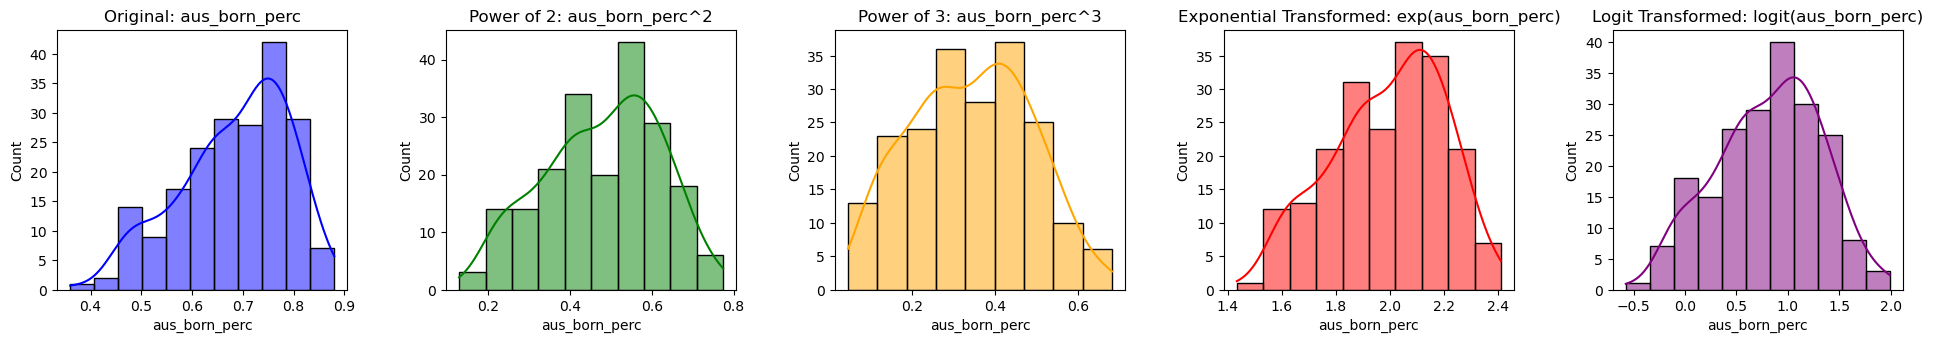

In [14]:
variables = ['aus_born_perc']

# Create subplots to compare the original and transformed distributions
fig, axes = plt.subplots(len(variables), 5, figsize=(20, 4 * len(variables)))
fig.tight_layout(pad=4.0)

# Flatten axes if there is only one row
if len(variables) == 1:
    axes = [axes]

for i, var in enumerate(variables):
    # Original distribution
    sns.histplot(df[var], kde=True, ax=axes[i][0], color='blue')
    axes[i][0].set_title(f'Original: {var}')
    
    # Power of 2 transformation
    sns.histplot(df[var]**2, kde=True, ax=axes[i][1], color='green')
    axes[i][1].set_title(f'Power of 2: {var}^2')

    # Power of 3 transformation
    sns.histplot(df[var]**3, kde=True, ax=axes[i][2], color='orange')
    axes[i][2].set_title(f'Power of 3: {var}^3')

    # Exponential transformation
    sns.histplot(np.exp(df[var]), kde=True, ax=axes[i][3], color='red')
    axes[i][3].set_title(f'Exponential Transformed: exp({var})')

    # Logit transformation 
    if (df[var].between(0, 1)).all():
        sns.histplot(np.log(df[var] / (1 - df[var])), kde=True, ax=axes[i][4], color='purple')
        axes[i][4].set_title(f'Logit Transformed: logit({var})')
    else:
        scaled_var = (df[var] - df[var].min()) / (df[var].max() - df[var].min())
        sns.histplot(np.log(scaled_var / (1 - scaled_var)), kde=True, ax=axes[i][4], color='purple')
        axes[i][4].set_title(f'Scaled Logit Transformed: logit({var})')

plt.show()

Based on the plots above, we decided to move forward with the Power of 2, Exponential, and Logit transformations, as these exhibited the closest resemblance to a normal distribution.

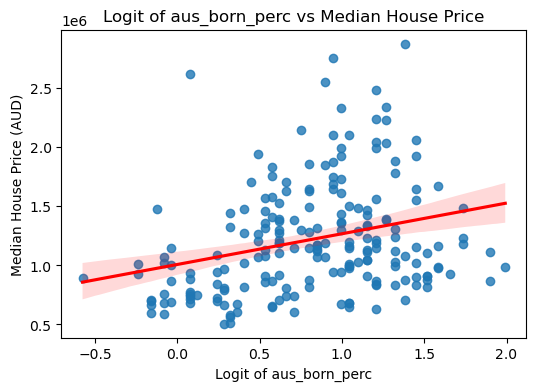

Correlation: 0.2800


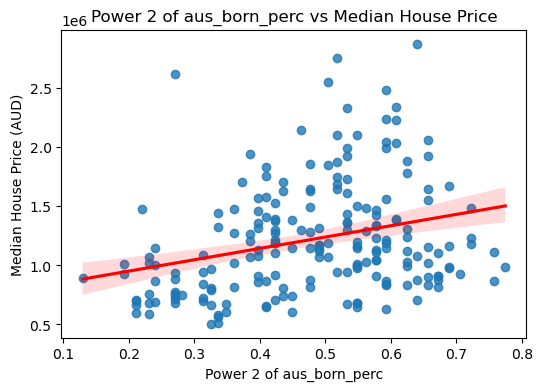

Correlation: 0.2876


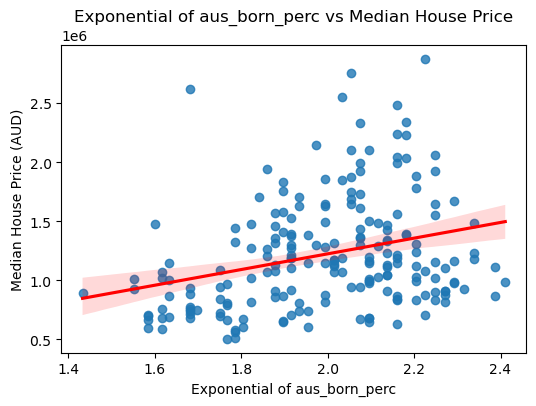

Correlation: 0.2931


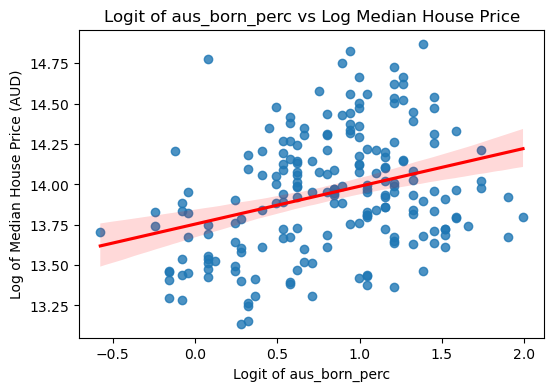

Correlation: 0.3223


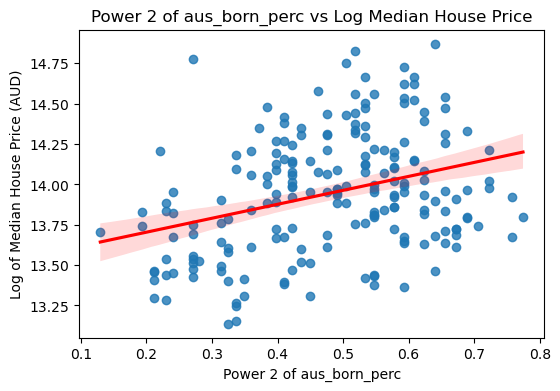

Correlation: 0.3299


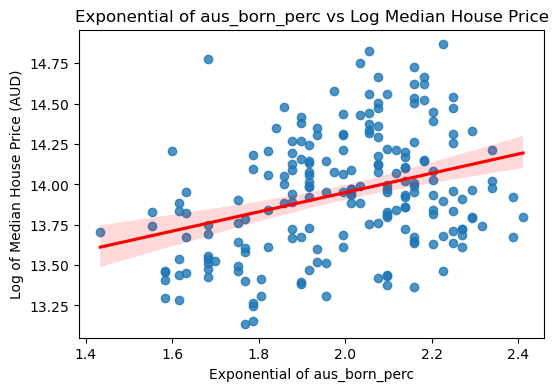

Correlation: 0.3358


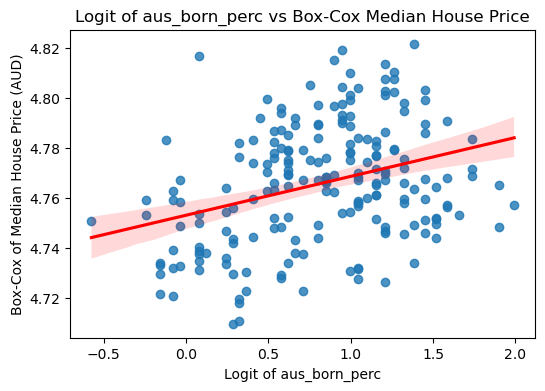

Correlation: 0.3293


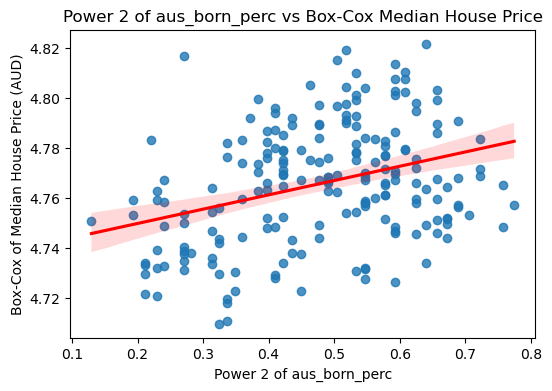

Correlation: 0.3369


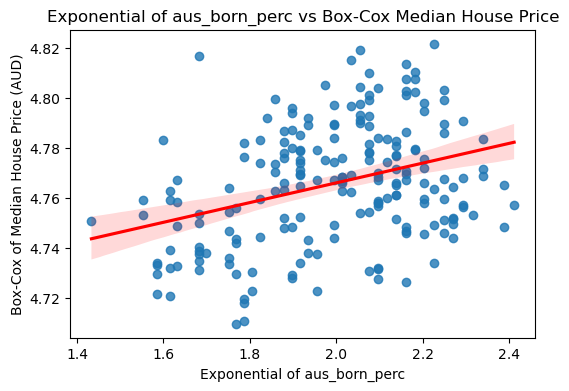

Correlation: 0.3428


In [15]:
# Variables for original, log-transformed, and Box-Cox transformed median_house_price
y_original = df['median_house_price']
y_log = np.log(df['median_house_price'])
y_boxcox, _ = stats.boxcox(df['median_house_price'])

# Logit transformation of aus_born_perc
df['logit_aus_born_perc'] = np.log(df['aus_born_perc'] / (1 - df['aus_born_perc']))
scatter_plot_with_regression(df['logit_aus_born_perc'], y_original, 
                             'Logit of aus_born_perc vs Median House Price', 'Logit of aus_born_perc', 'Median House Price (AUD)')

# Power of 2 transformation of aus_born_perc
df['power_2_aus_born_perc'] = df['aus_born_perc']**2
scatter_plot_with_regression(df['power_2_aus_born_perc'], y_original, 
                             'Power 2 of aus_born_perc vs Median House Price', 'Power 2 of aus_born_perc', 'Median House Price (AUD)')

# Exponential transformation of aus_born_perc
df['exp_aus_born_perc'] = np.exp(df['aus_born_perc'])
scatter_plot_with_regression(df['exp_aus_born_perc'], y_original, 
                             'Exponential of aus_born_perc vs Median House Price', 'Exponential of aus_born_perc', 'Median House Price (AUD)')

# Scatter plots for transformed aus_born_perc and log of median_house_price
scatter_plot_with_regression(df['logit_aus_born_perc'], y_log, 
                             'Logit of aus_born_perc vs Log Median House Price', 'Logit of aus_born_perc', 'Log of Median House Price (AUD)')

scatter_plot_with_regression(df['power_2_aus_born_perc'], y_log, 
                             'Power 2 of aus_born_perc vs Log Median House Price', 'Power 2 of aus_born_perc', 'Log of Median House Price (AUD)')

scatter_plot_with_regression(df['exp_aus_born_perc'], y_log, 
                             'Exponential of aus_born_perc vs Log Median House Price', 'Exponential of aus_born_perc', 'Log of Median House Price (AUD)')

# Scatter plots for transformed aus_born_perc and Box-Cox of median_house_price
scatter_plot_with_regression(df['logit_aus_born_perc'], y_boxcox, 
                             'Logit of aus_born_perc vs Box-Cox Median House Price', 'Logit of aus_born_perc', 'Box-Cox of Median House Price (AUD)')

scatter_plot_with_regression(df['power_2_aus_born_perc'], y_boxcox, 
                             'Power 2 of aus_born_perc vs Box-Cox Median House Price', 'Power 2 of aus_born_perc', 'Box-Cox of Median House Price (AUD)')

scatter_plot_with_regression(df['exp_aus_born_perc'], y_boxcox, 
                             'Exponential of aus_born_perc vs Box-Cox Median House Price', 'Exponential of aus_born_perc', 'Box-Cox of Median House Price (AUD)')

The variability across all plots remained quite similar. However, the exponential transformation of aus_born_perc yielded the best correlation with the Box-Cox transformed median_house_price at 0.3428. This was closely followed by the power of 2 transformation of aus_born_perc against Box-Cox transformed median_house_price at 0.3369, and the exponential transformation of aus_born_perc versus the log of median_house_price. Based on these results, the exponential transformation for aus_born_perc is the best choice.

#### 4.3.4 Variable: median_income

For median_income, we applied Logarithmic, Square Root, Box-Cox and Cube Root transformations to evaluate their effectiveness. After determining the most suitable transformation, we further analyzed its relationship with median_house_price, log-transformed median_house_price, and Box-Cox-transformed median_house_price.

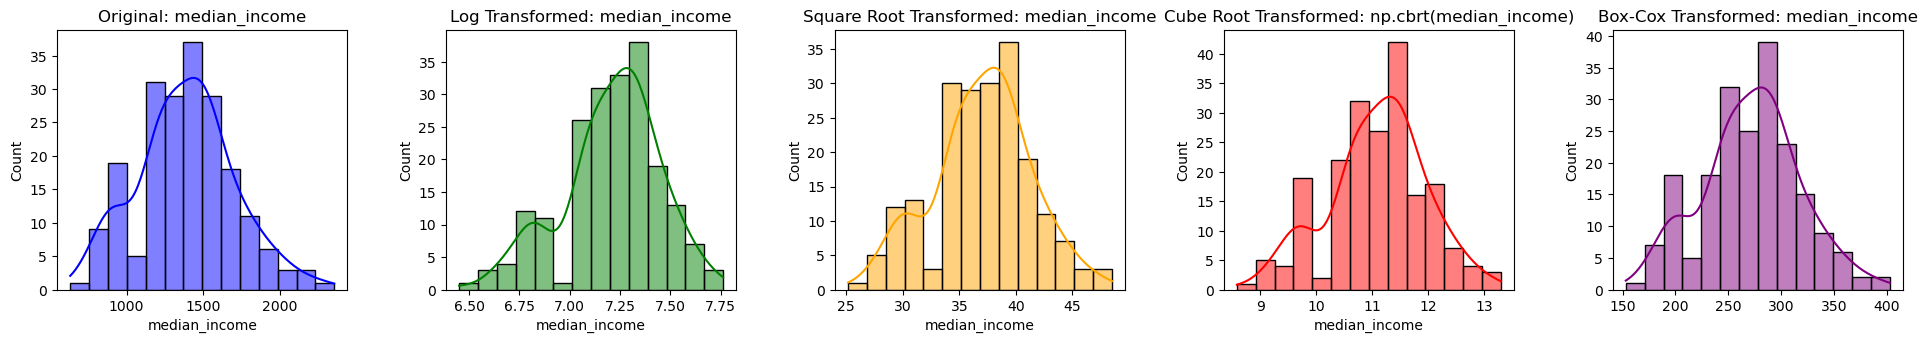

In [16]:
variables = ['median_income']

# Create subplots to compare the original and transformed distributions
fig, axes = plt.subplots(len(variables), 5, figsize=(20, 4 * len(variables)))  # Adjusted for 5 plots now
fig.tight_layout(pad=4.0)

if len(variables) == 1:
    axes = [axes]

for i, var in enumerate(variables):
    # Original distribution
    sns.histplot(df[var], kde=True, ax=axes[i][0], color='blue')
    axes[i][0].set_title(f'Original: {var}')
    
    # Log transformation
    sns.histplot(np.log(df[var]), kde=True, ax=axes[i][1], color='green')
    axes[i][1].set_title(f'Log Transformed: {var}')

    # Square root transformation
    sns.histplot(np.sqrt(df[var]), kde=True, ax=axes[i][2], color='orange')
    axes[i][2].set_title(f'Square Root Transformed: {var}')

    # Cube root transformation
    sns.histplot(np.cbrt(df[var]), kde=True, ax=axes[i][3], color='red')
    axes[i][3].set_title(f'Cube Root Transformed: np.cbrt({var})')
    
    # Box-Cox transformation (applies to positive values only)
    transformed, _ = stats.boxcox(df[var])
    sns.histplot(transformed, kde=True, ax=axes[i][4], color='purple')
    axes[i][4].set_title(f'Box-Cox Transformed: {var}')

plt.show()

plt.show()

The untransformed data was already quite close to a normal distribution, so we had to keep this in our analysis. Our approach focused on identifying which transformations pushed the variable further away from normality. After a thorough inspection, we decided to reject the log and square root transformations, as they moved the distribution farther from a normal shape.

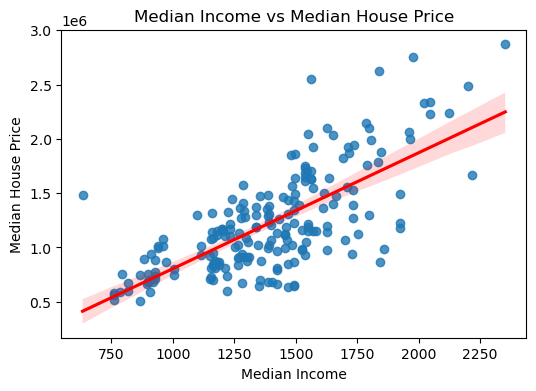

Correlation: 0.7194


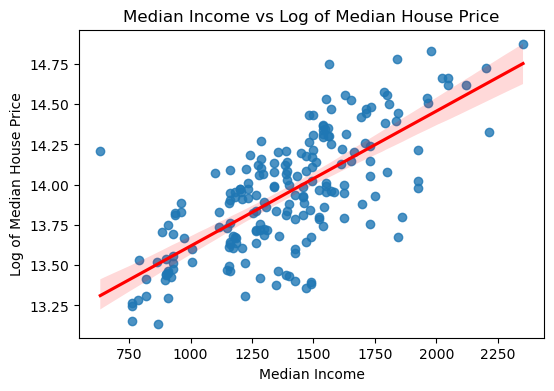

Correlation: 0.7198


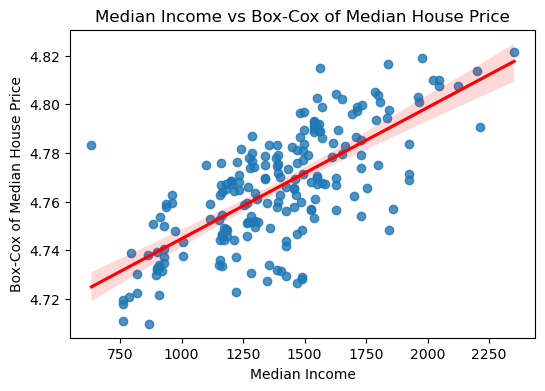

Correlation: 0.7164


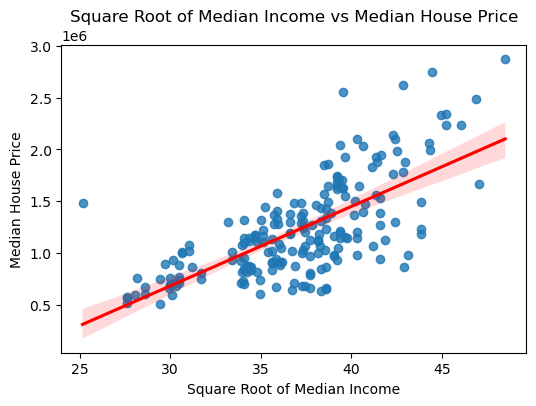

Correlation: 0.7035


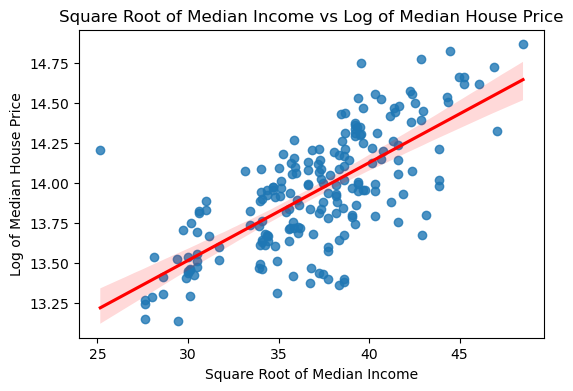

Correlation: 0.7142


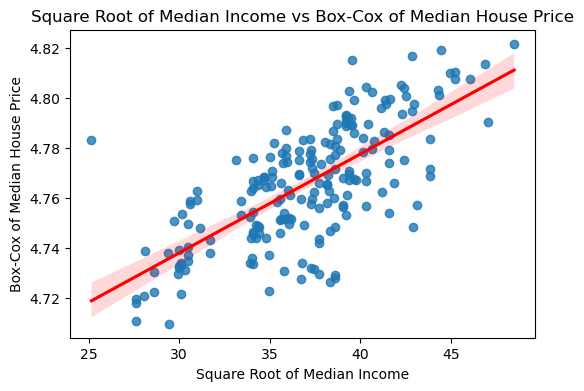

Correlation: 0.7128


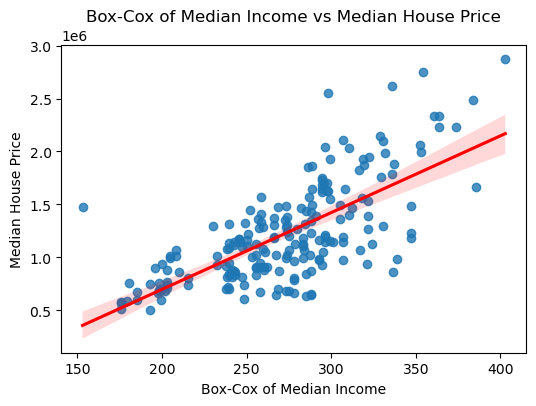

Correlation: 0.7116


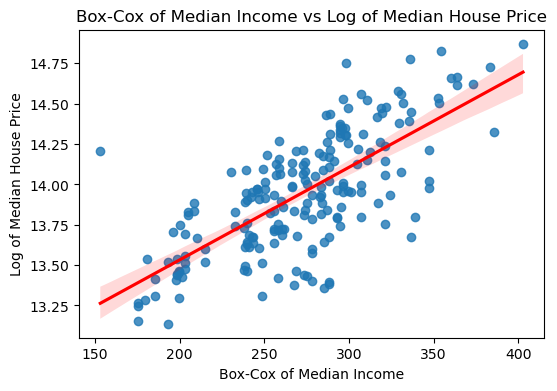

Correlation: 0.7175


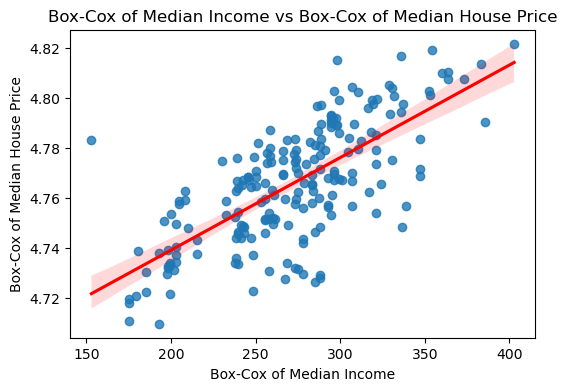

Correlation: 0.7151


In [17]:
# Median Income vs Median House Price
scatter_plot_with_regression(df['median_income'], df['median_house_price'],
                             'Median Income vs Median House Price', 
                             'Median Income', 'Median House Price')
# Median Income vs log of Median House Price
scatter_plot_with_regression(df['median_income'], np.log(df['median_house_price']),
                             'Median Income vs Log of Median House Price', 
                             'Median Income', 'Log of Median House Price')
# Median Income vs Box-Cox Median House Price
scatter_plot_with_regression(df['median_income'], df['boxcox_median_house_price'],
                             'Median Income vs Box-Cox of Median House Price', 
                             'Median Income', 'Box-Cox of Median House Price')

# Square Root of Median Income vs Median House Price
scatter_plot_with_regression(np.sqrt(df['median_income']), df['median_house_price'],
                             'Square Root of Median Income vs Median House Price', 
                             'Square Root of Median Income', 'Median House Price')

# Square Root of Median Income vs Log of Median House Price
scatter_plot_with_regression(np.sqrt(df['median_income']), np.log(df['median_house_price']),
                             'Square Root of Median Income vs Log of Median House Price', 
                             'Square Root of Median Income', 'Log of Median House Price')

# Square Root of Median Income vs Box-Cox of Median House Price
scatter_plot_with_regression(np.sqrt(df['median_income']), df['boxcox_median_house_price'],
                             'Square Root of Median Income vs Box-Cox of Median House Price', 
                             'Square Root of Median Income', 'Box-Cox of Median House Price')

# Box-Cox of Median Income vs Median House Price
df['boxcox_median_income'], fitted_lambda_income = stats.boxcox(df['median_income'])
scatter_plot_with_regression(df['boxcox_median_income'], df['median_house_price'],
                             'Box-Cox of Median Income vs Median House Price', 
                             'Box-Cox of Median Income', 'Median House Price')

# Box-Cox of Median Income vs Log of Median House Price
scatter_plot_with_regression(df['boxcox_median_income'], np.log(df['median_house_price']),
                             'Box-Cox of Median Income vs Log of Median House Price', 
                             'Box-Cox of Median Income', 'Log of Median House Price')

# Box-Cox of Median Income vs Box-Cox of Median House Price
scatter_plot_with_regression(df['boxcox_median_income'], df['boxcox_median_house_price'],
                             'Box-Cox of Median Income vs Box-Cox of Median House Price', 
                             'Box-Cox of Median Income', 'Box-Cox of Median House Price')

The untransformed median_income and the log of median_house_price demonstrated the strongest relationship, with a correlation of 0.7198. When both variables remained untransformed, the correlation was slightly lower at 0.7194. The third-best relationship was observed between the Box-Cox transformed median_income and the log of median_house_price, with a correlation of 0.7175, followed closely by the untransformed median_income and the Box-Cox transformed median_house_price at 0.7164. median_income does not seem to require transformation now, possibly scaling later on.

#### 4.3.5 Variable: population

For the variable population, we applied Logarithmic, Square Root, Box-Cox, and Cube Root transformations to assess their impact on normalizing the distribution. After selecting the most appropriate transformation, we analyzed its relationship with median_house_price, log-transformed median_house_price, and Box-Cox-transformed median_house_price to evaluate how well the transformations improved linearity and correlation.

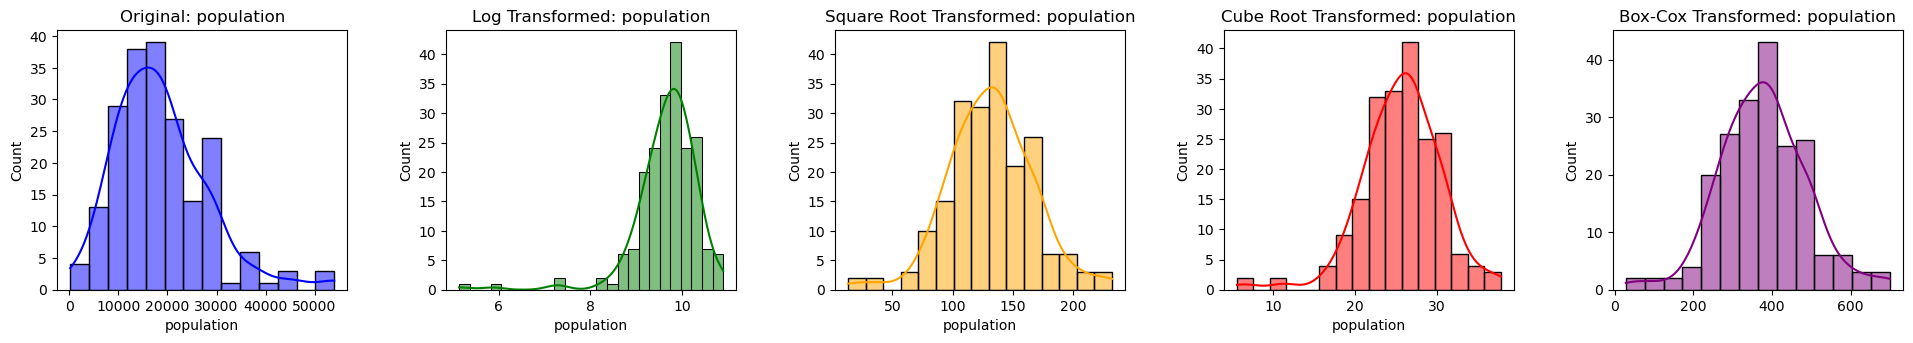

In [18]:
variables = ['population']

# Create subplots to compare the original and transformed distributions
fig, axes = plt.subplots(len(variables), 5, figsize=(20, 4 * len(variables)))  # Adjusted for 5 columns
fig.tight_layout(pad=4.0)

# Flatten axes if there is only one row
if len(variables) == 1:
    axes = [axes]

for i, var in enumerate(variables):
    # Original distribution
    sns.histplot(df[var], kde=True, ax=axes[i][0], color='blue')
    axes[i][0].set_title(f'Original: {var}')
    
    # Log transformation
    sns.histplot(np.log(df[var]), kde=True, ax=axes[i][1], color='green')
    axes[i][1].set_title(f'Log Transformed: {var}')

    # Square root transformation
    sns.histplot(np.sqrt(df[var]), kde=True, ax=axes[i][2], color='orange')
    axes[i][2].set_title(f'Square Root Transformed: {var}')

    # Cube root transformation
    sns.histplot(np.cbrt(df[var]), kde=True, ax=axes[i][3], color='red')
    axes[i][3].set_title(f'Cube Root Transformed: {var}')

    # Box-Cox transformation
    transformed, _ = stats.boxcox(df[var])
    sns.histplot(transformed, kde=True, ax=axes[i][4], color='purple')
    axes[i][4].set_title(f'Box-Cox Transformed: {var}')

plt.show()

In the above plots, Logarithm is highly left skewed, so we reject it. There is slight skweness in cube root as well compared to the others. Further analysis was applied on untrasnformed, square root and box-cox.

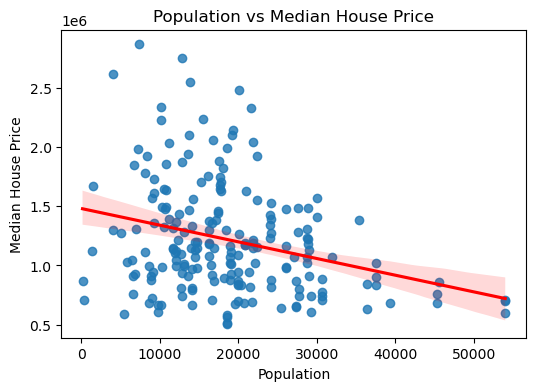

Correlation: -0.2872


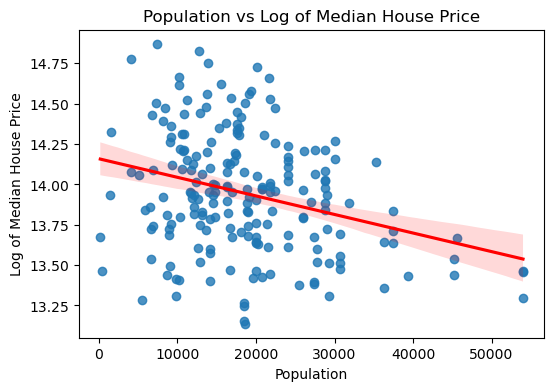

Correlation: -0.2985


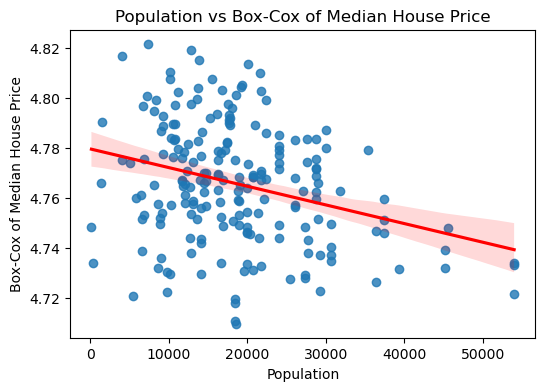

Correlation: -0.2990


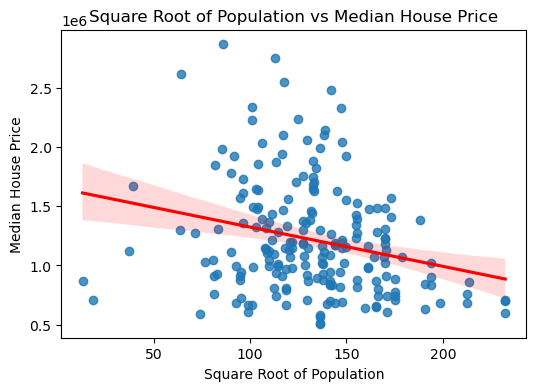

Correlation: -0.2505


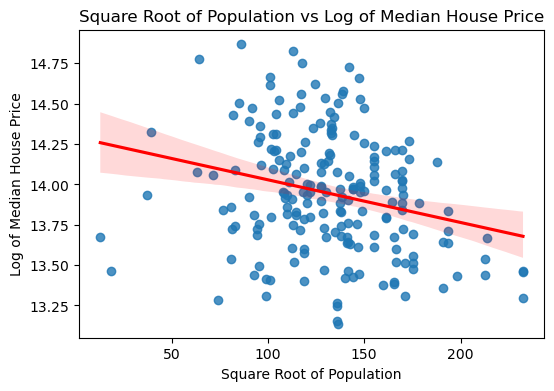

Correlation: -0.2543


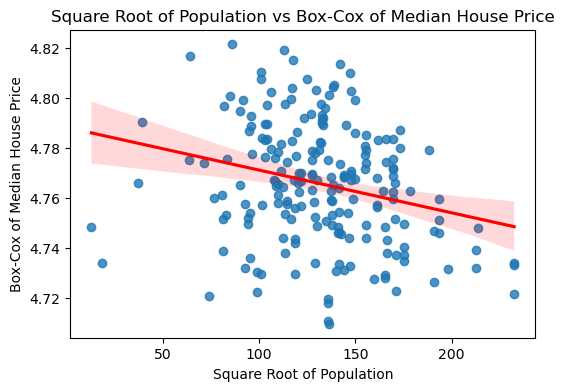

Correlation: -0.2536


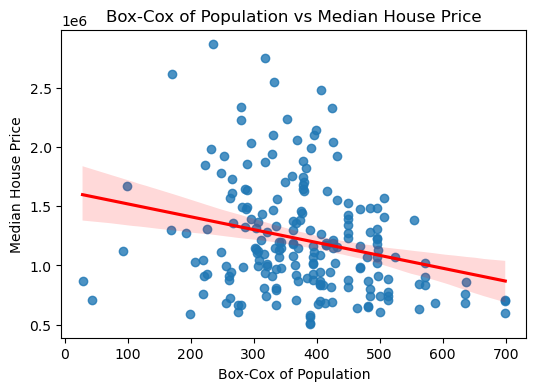

Correlation: -0.2555


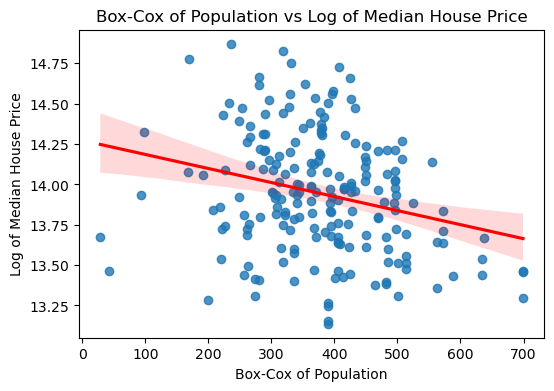

Correlation: -0.2600


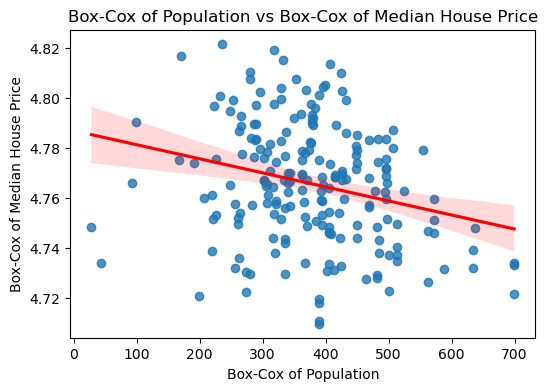

Correlation: -0.2595


In [19]:
# Population vs Median House Price
scatter_plot_with_regression(df['population'], df['median_house_price'],
                             'Population vs Median House Price', 
                             'Population', 'Median House Price')

# Population vs Log of Median House Price
scatter_plot_with_regression(df['population'], np.log(df['median_house_price']),
                             'Population vs Log of Median House Price', 
                             'Population', 'Log of Median House Price')

# Population vs Box-Cox of Median House Price
scatter_plot_with_regression(df['population'], df['boxcox_median_house_price'],
                             'Population vs Box-Cox of Median House Price', 
                             'Population', 'Box-Cox of Median House Price')

# Square Root of Population vs Median House Price
scatter_plot_with_regression(np.sqrt(df['population']), df['median_house_price'],
                             'Square Root of Population vs Median House Price', 
                             'Square Root of Population', 'Median House Price')

# Square Root of Population vs Log of Median House Price
scatter_plot_with_regression(np.sqrt(df['population']), np.log(df['median_house_price']),
                             'Square Root of Population vs Log of Median House Price', 
                             'Square Root of Population', 'Log of Median House Price')

# Square Root of Population vs Box-Cox of Median House Price
scatter_plot_with_regression(np.sqrt(df['population']), df['boxcox_median_house_price'],
                             'Square Root of Population vs Box-Cox of Median House Price', 
                             'Square Root of Population', 'Box-Cox of Median House Price')

# Box-Cox of Population vs Median House Price
df['boxcox_population'], fitted_lambda_population = stats.boxcox(df['population'])
scatter_plot_with_regression(df['boxcox_population'], df['median_house_price'],
                             'Box-Cox of Population vs Median House Price', 
                             'Box-Cox of Population', 'Median House Price')

# Box-Cox of Population vs Log of Median House Price
scatter_plot_with_regression(df['boxcox_population'], np.log(df['median_house_price']),
                             'Box-Cox of Population vs Log of Median House Price', 
                             'Box-Cox of Population', 'Log of Median House Price')

# Box-Cox of Population vs Box-Cox of Median House Price
scatter_plot_with_regression(df['boxcox_population'], df['boxcox_median_house_price'],
                             'Box-Cox of Population vs Box-Cox of Median House Price', 
                             'Box-Cox of Population', 'Box-Cox of Median House Price')

The untransformed population variable against the Box-Cox transformed median_house_price showed the strongest correlation at -0.2990, closely followed by the untransformed population against the log-transformed median_house_price with a correlation of -0.2985. Based on these results, we concluded that the untransformed population is the most suitable for regression analysis and will be subject to scaling or normalization in the next steps.

## 5. Selected Transformations for Regression

Based on our analysis in the previous section, we identified the most suitable transformations for the independent variables:

- Cube Root of number_of_houses
- Cube Root of number_of_units
- Exponential of aus_born_perc
- Untransformed median_income
- Untransformed population

As for the dependent variable, box-cox transformation of median_house_price emerged as the best transformation in three instances, while the log and untransformed versions performed best in one instance each. The log transformation was the second-best in three instances.

## 6. Scaling Method Selection: Standard Scaler

In this analysis, we opted for Standard Scaling over Robust Scaling and Min-Max Scaling due to the nature of our transformed variables and the linear regression model. Standard Scaling ensures that each feature has a mean of 0 and a standard deviation of 1, which is particularly important when dealing with features that vary in magnitude, as in our dataset. This method helps to center the data, making the regression coefficients easier to interpret in terms of standard deviations, which aligns well with the assumptions of linear regression.

Robust Scaling, while effective for data with extreme outliers, was not chosen because our transformations (such as cube root, exponential, and Box-Cox) have already addressed skewness and outliers. Min-Max Scaling, which compresses data within a 0 to 1 range, was also deemed less appropriate as it is highly sensitive to outliers and could distort the feature ranges in linear regression, potentially leading to biased results.

By using Standard Scaling, we ensure that all features contribute equally to the model, without allowing variables with larger magnitudes to dominate. This is crucial for linear regression models, where feature scaling impacts the optimization process and the interpretation of coefficients.

In [20]:
# Independent variables
X = pd.DataFrame({
    'cube_root_number_of_houses': np.cbrt(df['number_of_houses']),
    'cube_root_number_of_units': np.cbrt(df['number_of_units']),
    'exp_aus_born_perc': np.exp(df['aus_born_perc']),
    'median_income': df['median_income'],
    'population': df['population']
})

# Standardize the independent variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## 7. Model Evaluation

In [21]:
# Function to run linear regression and plot residuals
def run_regression_and_plot_residuals(X, y, target_name):
    # Add a constant to the independent variables for the intercept
    X = sm.add_constant(X)
    
    # Fit the model
    model = sm.OLS(y, X).fit()
    
    # Predict values
    y_pred = model.predict(X)
    
    # Calculate residuals
    residuals = y - y_pred
    
    # Print R^2 value
    print(f"R^2 for {target_name}: {model.rsquared:.4f}")
    
    # Q-Q plot of residuals
    plt.figure(figsize=(6, 6))
    stats.probplot(residuals, dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of Residuals for {target_name}')
    plt.show()

    
# Prepare the untransformed independent variables for the baseline model
X_baseline = pd.DataFrame({
    'number_of_houses': df['number_of_houses'],
    'number_of_units': df['number_of_units'],
    'aus_born_perc': df['aus_born_perc'],
    'median_income': df['median_income'],
    'population': df['population']
})

# Target variable
y_boxcox = df['boxcox_median_house_price']
y_log = np.log(df['median_house_price'])
y_original = df['median_house_price']

R^2 for Untransformed Median House Price: 0.6364


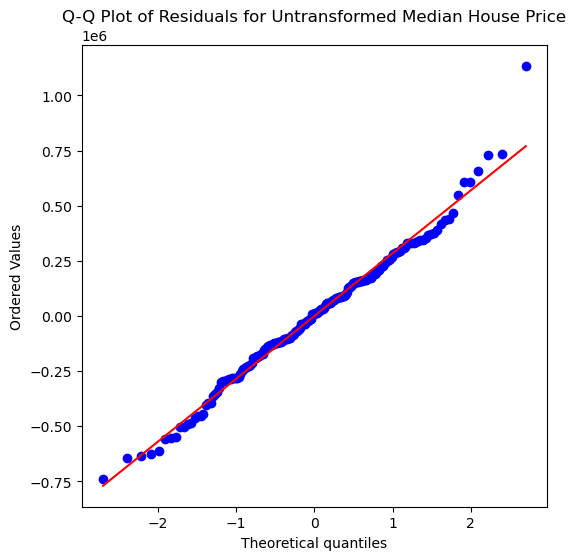

In [22]:
# Run and plot residuals for Baseline Model
run_regression_and_plot_residuals(X_baseline, y_original, 'Untransformed Median House Price')

R^2 for Box-Cox Transformed Median House Price: 0.6752


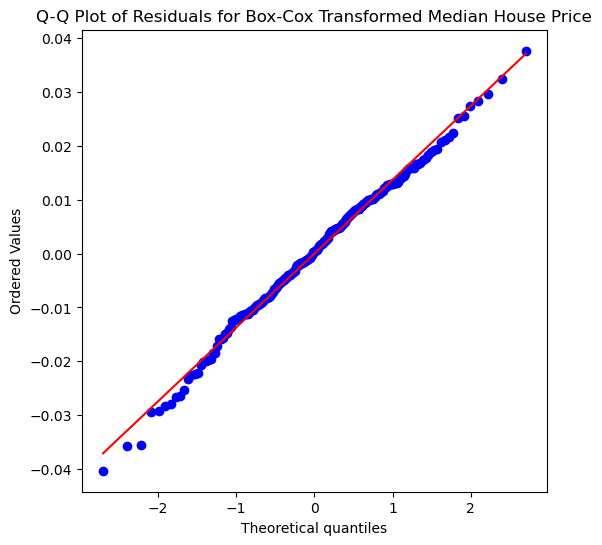

In [23]:
# Run and plot residuals for Box-Cox transformed target (Scaled)
run_regression_and_plot_residuals(X_scaled, y_boxcox, 'Box-Cox Transformed Median House Price')

R^2 for Log-Transformed Median House Price: 0.6812


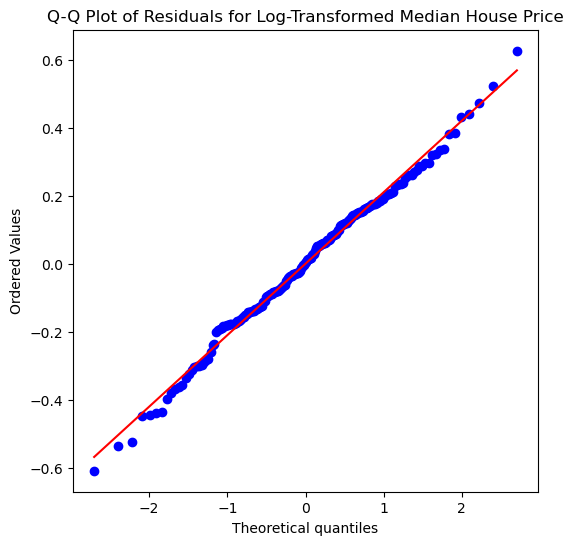

In [24]:
# Run and plot residuals for log-transformed target (Scaled)
run_regression_and_plot_residuals(X_scaled, y_log, 'Log-Transformed Median House Price')

R^2 for Untrasnformed Median House Price: 0.6786


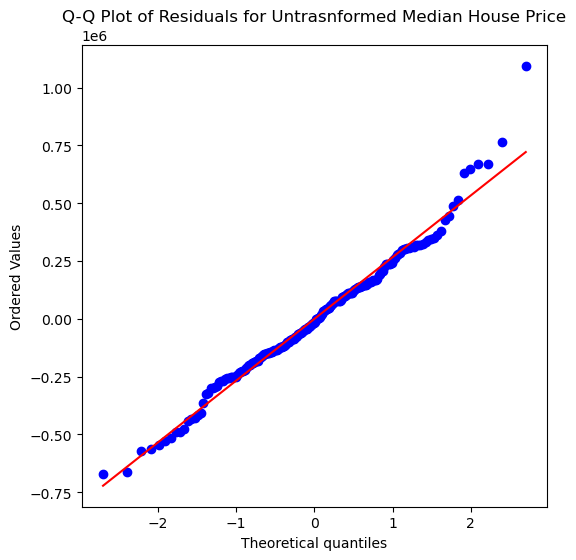

In [25]:
# Run and plot residuals for untransformed target (Scaled)
run_regression_and_plot_residuals(X_scaled, y_original, 'Untrasnformed Median House Price')

- The Box-Cox transformation produced the most normally distributed and homoscedastic residuals, even though it had the lowest R² value (0.6752). This suggests that Box-Cox adheres best to the regression assumptions, particularly the normality of residuals.<br><br>

- The log-transformed version achieved the highest R² (0.6812), indicating that it explained the most variance in the dependent variable. While its residuals were not as close to normality as those from the Box-Cox transformation, they were still reasonably close, making it a strong contender, especially for predictive performance.<br><br>


- The untransformed version had a similar R² to the log-transformed version (0.6786), but the residuals deviated more from normality, making it the least preferred option from a regression diagnostics perspective. However, it may still be valuable for interpretability.<br><br>

Given these results, although the Box-Cox transformation adheres best to regression assumptions, we recommend proceeding with the log-transformed median_house_price. It offers the highest R² and strikes a balance between maximizing predictive performance and maintaining a good normality of the residuals. Furthermore, it’s worth noting that all transformed versions performed better than the baseline model.

## 8. Suggested Improvements

- While the applied transformations improved model performance, the process could be enhanced by addressing the presence of outliers that potentially impact the data distribution. <br><br>

- Exploring interactions between variables could reveal more significant relationships not captured in individual transformations.

## 9. Conclusion

The Box-Cox transformation produced the most normally distributed and homoscedastic residuals, but the log-transformed model achieved the highest R² value, striking the best balance between predictive performance and adherence to regression assumptions. Based on the overall analysis, the log-transformed median_house_price is recommended for further modeling. All transformations significantly outperformed the baseline model, indicating successful improvements in model performance.

The final transformed independent variables used in the model are as follows:

- Cube Root of number_of_houses (Standard Scaled).
- Cube Root of number_of_units (Standard Scaled).
- Exponential of aus_born_perc (Standard Scaled).
- Untransformed median_income (Standard Scaled).
- Untransformed population (Standard Scaled).

These transformations, in combination with the log-transformed dependent variable, provide the best foundation for further regression modeling and analysis.

## 10. References

Abdallah, Z. (n.d.). Data reshaping. Monash University.

Numpy Functions (e.g., np.array, np.median):
Reference:
Harris, C. R., Millman, K. J., van der Walt, S. J., Gommers, R., Virtanen, P., Cournapeau, D., ... & Oliphant, T. E. (2020). Array programming with NumPy. Nature, 585(7825), 357-362. https://numpy.org/doc/stable/

Pandas Functions (e.g., pd.DataFrame, pd.read_csv):
Reference:
McKinney, W. (2010). Data structures for statistical computing in Python. In Proceedings of the 9th Python in Science Conference (pp. 51-56). https://pandas.pydata.org/pandas-docs/stable/

Scikit-learn Functions (e.g., LinearRegression, train_test_split):
Reference:
Pedregosa, F., Varoquaux, G., Gramfort, A., Michel, V., Thirion, B., Grisel, O., ... & Duchesnay, E. (2011). Scikit-learn: Machine learning in Python. Journal of Machine Learning Research, 12, 2825-2830. https://scikit-learn.org/stable/

Matplotlib Functions (e.g., plt.scatter, plt.boxplot):
Reference:
Hunter, J. D. (2007). Matplotlib: A 2D graphics environment. Computing in Science & Engineering, 9(3), 90-95. https://matplotlib.org/stable/contents.html

Statsmodels Functions (e.g., OLS):
Reference:
Seabold, S., & Perktold, J. (2010). Statsmodels: Econometric and statistical modeling with Python. In Proceedings of the 9th Python in Science Conference (pp. 57-61). https://www.statsmodels.org/stable/